#Importing the Library

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from pathlib import Path
from typing import Tuple, List, Dict, Any

##Creating the Directory

In [ ]:
data_dir = Path("./data")
current_q1 = data_dir/"current_q1.json"
current_q2 = data_dir/"current_q2.json"
historical_data = data_dir/"hist_data.json"

if data_dir.is_dir():
  print(f"The {data_dir} is already created!!!")
else:
  print(f"Creating the {data_dir} directory....")
  Path.mkdir(data_dir, parents=True, exist_ok=True)
  print(f"Created the {data_dir} directory.")


The data is already created!!!


## Importing the Data from the URLS

In [ ]:
#Importing the data
try:
  response = requests.get("https://www.jsonkeeper.com/b/LLQT")
  response.raise_for_status()

  with open(current_q1, "wb") as q1:
    q1.write(response.content)

except requests.exceptions.RequestException as e:
  print(f"Error occured while processing the data from {https://www.jsonkeeper.com/b/LLQT}: {e}")

try:
  response = requests.get("https://api.jsonserve.com/rJvd7g")
  response.raise_for_status()
  data = response.json()
  # Convert the main-level JSON keys into a DataFrame row
  main_data = {k: v for k, v in data.items() if not isinstance(v, (dict, list))}

  # Flatten the 'quiz' data into additional columns
  quiz_data = data['quiz']
  for key, value in quiz_data.items():
      main_data[f"quiz_{key}"] = value

  # Include 'response_map' as a separate DataFrame (if needed)
  response_map_df = pd.DataFrame(list(data['response_map'].items()), columns=['question_id', 'response_id'])

  # Combine everything into one DataFrame
  df_main = pd.DataFrame([main_data])  # Wrapping it in a list creates a single-row DataFrame

except requests.exceptions.RequestException as e:
  print(f"Error occured while processing the data from {https://api.jsonserve.com/rJvd7g}: {e}")

try:
  response = requests.get("https://api.jsonserve.com/XgAgFJ")
  response.raise_for_status()

  with open(historical_data, "wb") as q3:
    q3.write(response.content)

except requests.exceptions.RequestException as e:
  print(f"Error occured while processing the data from {https://api.jsonserve.com/XgAgFJ}: {e}")

##Loading the .json Files into DataFrame


In [ ]:
df_1 = pd.read_json(current_q1)
df_3 = pd.read_json(historical_data)

In [ ]:
df_1.head()

,quiz
id,43
name,None
title,Structural Organisation in Animals and Plants (7)
description,
difficulty_level,None


In [ ]:
df_main.head()

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,quiz_exam_id,quiz_show_unanswered,quiz_ends_at,quiz_lives,quiz_live_count,quiz_coin_count,quiz_questions_count,quiz_daily_date,quiz_max_mistake_count,quiz_reading_materials
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17T15:51:29.859+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80 %,100,...,None,False,2025-01-18,None,Free Test,-1,128,"January 17, 2025",15,[]


In [ ]:
response_map_df

,question_id,response_id
0,1837,7363
1,1848,7407
2,1852,7423
3,1862,7464
4,1877,7525
5,1878,7529
6,1900,7617
7,1917,7685
8,1934,7750
9,1964,7872


In [ ]:
df_3.head()

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:30:18.027000+05:30,2025-01-17 15:30:18.044000+05:30,2025-01-17 15:30:18.044000+05:30,108,2,90 %,100,...,2025-01-17 15:18:30+05:30,2025-01-17 15:30:15+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:17:44.042000+05:30,2025-01-17 15:17:44.056000+05:30,2025-01-17 15:17:44.056000+05:30,92,1,100 %,100,...,2025-01-17 15:07:45+05:30,2025-01-17 15:17:41+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:13:19.682000+05:30,2025-01-16 20:13:19.699000+05:30,2025-01-16 20:13:19.699000+05:30,116,2,96 %,100,...,2025-01-16 20:01:10+05:30,2025-01-16 20:13:18+05:30,15:00,115,100,Topic Rank - #-418,11,12,"{'2523': 10109, '2525': 10117, '2528': 10127, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:00:11.562000+05:30,2025-01-16 20:00:11.573000+05:30,2025-01-16 20:00:11.573000+05:30,36,2,90 %,100,...,2025-01-16 19:52:57+05:30,2025-01-16 20:00:09+05:30,15:00,152,23,Topic Rank - #-1598,1,2,"{'49': 197, '52': 208, '53': 212, '54': 217, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15 20:34:39.462000+05:30,2025-01-15 20:34:39.478000+05:30,2025-01-15 20:34:39.478000+05:30,36,3,31 %,96,...,2025-01-15 20:21:25+05:30,2025-01-15 20:34:38+05:30,15:00,35,100,Topic Rank - #2023,0,20,"{'2521': 10099, '2523': 10107, '2532': 10145, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."


In [ ]:
# Load data
def load_json(file_path:Path):
  """
  This function loads and reads the json file by taking in the path of the json file.
  """
  with open(file_path, "r") as f:
      return json.load(f)

In [ ]:
data_q1 = load_json(file_path=current_q1)
hist_data = load_json(file_path=historical_data)

##Building function to analyze the json data and function to generate recommendations

In [ ]:
# Analysis Function
def analyze_data(current_data:Dict[str,Any], historical_data:Dict[str,Any])->Dict[str,Any]:
  """
  This funtions takes in the loaded json files and analysize it according to the taks assigned.
  """
  # Extract quiz-level data
  quiz = current_data.get("quiz", {})
  total_questions = quiz.get("questions_count", 0)
  title = quiz.get("title", "Unknown Quiz")
  topic = quiz.get("topic", "Unknown Topic")

  # Analyze questions
  questions = quiz.get("questions", [])
  correct_answers = sum(1 for q in questions if any(opt["is_correct"] for opt in q.get("options", [])))
  accuracy = (correct_answers / total_questions) * 100 if total_questions > 0 else 0

  # Historical analysis
  historical_scores = [quiz["score"] for quiz in historical_data]
  improvement_trend = historical_scores[-1] - historical_scores[0] if len(historical_scores) > 1 else 0

  # Identify weak topics (if topics exist in historical data)
  historical_topics = [quiz["quiz"]["topic"] for quiz in historical_data if "quiz" in quiz]
  topic_performance = pd.Series(historical_topics).value_counts()

  # Insights
  insights = {
      "quiz_title": title,
      "quiz_topic": topic,
      "accuracy": accuracy,
      "improvement_trend": improvement_trend,
      "weak_topics": topic_performance.index[-3:] if not topic_performance.empty else [],
  }
  return insights

In [ ]:
# Recommendations
def generate_recommendations(insights:Dict)->List:
  """
  This Function Generates a List of recommendations to focus on the weak topics and tell other details.
  """
  recommendations = []

  # Weak Topics
  weak_topics = insights['weak_topics']
  if not weak_topics.empty:  # Check if weak_topics is not empty
      weak_topics_list = weak_topics.tolist()  # Convert to a list
      weak_topics_str = ', '.join(weak_topics_list)
      recommendations.append(f"Focus on these weak topics: {weak_topics_str}.")
  else:
      recommendations.append("Great work! No weak topics identified from historical data.")

  # Accuracy
  recommendations.append(f"Your accuracy is {insights['accuracy']}%. Keep practicing to maintain or improve this level.")

  # Improvement Trend
  if insights['improvement_trend'] < 0:
      recommendations.append(
          f"Your improvement trend is {insights['improvement_trend']}. Consider revisiting earlier topics and addressing gaps."
      )
  else:
      recommendations.append(
          f"Your improvement trend is {insights['improvement_trend']}. Great work! Keep up the consistent progress."
      )

  return recommendations



In [ ]:
insights = analyze_data(current_data=data_q1, historical_data=hist_data)
recommendation = generate_recommendations(insights=insights)

In [ ]:
df_1.columns

Index(['quiz'], dtype='object')

In [ ]:
insights.keys()

dict_keys(['quiz_title', 'quiz_topic', 'accuracy', 'improvement_trend', 'weak_topics'])

In [ ]:
insights

{'quiz_title': 'Structural Organisation in Animals and Plants (7)',
 'quiz_topic': 'Structural Organisation in Animals',
 'accuracy': 100.0,
 'improvement_trend': -84,
 'weak_topics': Index(['human health and disease ', 'Reproductive Health',
        'Respiration and Gas Exchange'],
       dtype='object')}

In [ ]:
recommendation

['Focus on these weak topics: human health and disease , Reproductive Health, Respiration and Gas Exchange.',
 'Your accuracy is 100.0%. Keep practicing to maintain or improve this level.',
 'Your improvement trend is -84. Consider revisiting earlier topics and addressing gaps.']

In [ ]:
recommendation

['Focus on these weak topics: human health and disease , Reproductive Health, Respiration and Gas Exchange.',
 'Your accuracy is 100.0%. Keep practicing!',
 'Your improvement trend is -84.']

In [ ]:
def visualize_performance(historical_data):
    historical_scores = [quiz["score"] for quiz in historical_data]
    plt.plot(historical_scores, marker='o')
    plt.title("Performance Trend")
    plt.xlabel("Quiz Index")
    plt.ylabel("Score")
    plt.show()

In [ ]:
def define_student_persona(accuracy, improvement_trend):
    if accuracy > 80 and improvement_trend > 10:
        return "High Achiever"
    elif accuracy < 50 and improvement_trend < 5:
        return "Needs Improvement"
    elif improvement_trend > 10:
        return "Rapid Improver"
    else:
        return "Steady Performer"

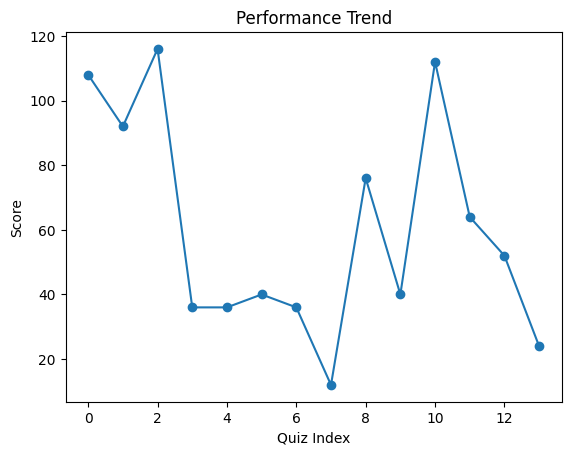

In [ ]:
visualize_performance(historical_data=hist_data)

In [ ]:
define_student_persona(accuracy=insights["accuracy"],improvement_trend=insights["improvement_trend"])

'Steady Performer'